### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Hypothesis
$h(\Theta) = \Theta_{0}x_{0} + \Theta_{1}x_{1} + ... + \Theta_{n}x_{n}$

### Read Data off CSV

In [2]:
data = pd.read_csv('ex1data2.txt')

In [3]:
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Plotting data in 3d space

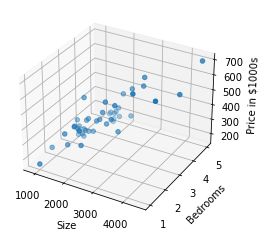

In [5]:
# Initialzing figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Labels
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price in $1000s')

# Plotting the data
ax.scatter(data['Size'],data['Bedrooms'],data['Price']/1000);


### Seperating Features and Label

In [6]:
# Features
X = data.drop('Price', axis=1)
X.head()

,Size,Bedrooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [7]:
# label
Y = data['Price']
Y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: Price, dtype: int64

### Normalizing Features

### $ \Theta_{n} = \frac{\Theta_{n} - \bar{x}}{\sigma} $


$\Theta_{n}$ = Features

$\bar{x}$ = Mean

${\sigma}$ = Standard Deviation


In [8]:
size_mean = X['Size'].mean()
size_std = X['Size'].std()
bedrooms_mean = X['Bedrooms'].mean()
bedrooms_std = X['Bedrooms'].std()

In [9]:
X['Size'] = (X['Size'] - size_mean) / size_std

In [10]:
X['Bedrooms'] = (X['Bedrooms'] - bedrooms_mean) / bedrooms_std

In [11]:
X.describe()

,Size,Bedrooms
count,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16
std,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00
25%,-7.155897e-01,-2.236752e-01
50%,-1.417900e-01,-2.236752e-01
75%,3.376348e-01,1.090417e+00
max,3.117292e+00,2.404508e+00


In [12]:
X.head()

,Size,Bedrooms
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [13]:
Y.head()


0    399900
1    329900
2    369000
3    232000
4    539900
Name: Price, dtype: int64

In [14]:
# Number of Examples
m = len(X)

# Creating dataframe full of ones as dummy feature to  fit our hypothesis
ones = pd.DataFrame(np.ones((m,1)))
ones.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [15]:
# Adding a column of ones as feature
X.insert(0, "ones", ones)

In [16]:
X.head()

,ones,Size,Bedrooms
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417


### Cost Function
$J(\Theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)})- y^{(i)})^{2}$

#### Hypothesis
$h(\Theta) = \Theta_{0}x_{0} + \Theta_{1}x_{1} + ... + \Theta_{n}x_{n}$

In [17]:
# Function to calculate the cost function given features, label and theta

def computeCostMulti(X, y, theta):
    m = len(X)                    # Number of data
    n = len(X.columns)            # Number of features
    feature_names = X.columns     # Name of features
    
    sq_sum_err = 0                # Squared Sum Error
    y_predicted = 0               # Predicted Y using theta
    
    for i in range(m):
        # value of h(x) - y
        y_predicted = sum([theta[j] * X[feature_names[j]][i] for j in range(n)])
        # adding y_predicted^2 to total
        sq_sum_err += np.square(y_predicted - y[i]) 
    
    J = sq_sum_err / (2*m)
    
    return J

computeCostMulti(X, Y , [0, 0, 0])
        
    
    

65591548106.45744

### Gradient Descent Algorithm\
$\Theta_{j} := \Theta_{j} - \alpha \frac{\partial }{\partial\Theta_{j}} J(\Theta_{0}, \Theta_{1}, ... , \theta_{n})$

$\Theta_{j} := \Theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\Theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}$  (simultaneously update $\Theta_{j}$ for all $j$)

In [18]:

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    m = len(X)                               # Number of data
    n = len(X.columns)                       # Number of features
    feature_names = X.columns
    
    J_history = np.zeros((num_iters,1))      # Array to keep track of Cost Function

    for iters in range(num_iters):
        
        J = computeCostMulti(X, y, theta)     # Computing Cost function
        J_history[iters] = J                  # Adding cost function to the array
        
        
        ########################################################################
        
        print(f'Cost:{J}', end='  ')
        for i in range(n):
            print(f'theta{i}:{theta[i]}', end='  ')
        print('')
        
        ###########################################################################
        
        new_theta = [None]*n                   # New values of theta to be set afterwards
        summation = 0                          # The summation part of the algorithm
        
        for i in range(n):            
            
            summation = sum((np.sum((X*theta), axis=1) - y) * X[feature_names[i]]) 
            new_theta[i] = theta[i] - alpha * (1/m) * summation
            
        theta = new_theta                     # Changing the values of theta
            
    return theta, J_history
            
        
        
        

### Setting our hyperparameters

In [19]:
# Learning Rate
alpha = 0.1
# Number of Iterations
num_iters = 400
# Initial Guess
theta = [0, 0, 0]


In [20]:
theta, J_history = gradientDescentMulti(X, Y, theta, alpha, num_iters)

Cost:65591548106.45744  theta0:0  theta1:0  theta2:0  
Cost:53294079419.249504  theta0:34041.26595744681  theta1:10463.293376618245  theta2:5412.368384407585  
Cost:43427073067.89616  theta0:64678.40531914894  theta1:19605.893264289  theta2:9721.57166639987  
Cost:35499635425.21072  theta0:92251.83074468085  theta1:27617.51832108549  theta2:13107.960200418518  
Cost:29122571721.065815  theta0:117067.91362765957  theta1:34659.43484055933  theta2:15723.835441486834  
Cost:23986667348.856903  theta0:139402.3882223404  theta1:40868.77867961803  theta2:17697.754497039707  
Cost:19845773040.119987  theta0:159503.41535755317  theta1:46362.21827694793  theta2:19138.17651763388  
Cost:16503590007.117666  theta0:177594.33977924465  theta1:51239.05932171112  theta2:20136.551454038643  
Cost:13803314822.50311  theta0:193876.17175876698  theta1:55583.876280789205  theta2:20769.936358139035  
Cost:11619502166.181105  theta0:208529.8205403371  theta1:59468.742985138655  theta2:21103.21139870413  
Cos

Cost:2043771199.516671  theta0:340389.3210141852  theta1:109563.4230642922  theta2:-5581.87652659919  
Cost:2043729777.0329902  theta0:340391.6548702135  theta1:109609.40422292371  theta2:-5627.853185769724  
Cost:2043691851.078199  theta0:340393.7553406389  theta1:109653.40486258239  theta2:-5671.8500129345275  
Cost:2043657125.9278457  theta0:340395.64576402184  theta1:109695.51031600668  theta2:-5713.952235947503  
Cost:2043625330.9784217  theta0:340397.3471450665  theta1:109735.80223515833  theta2:-5754.241417899427  
Cost:2043596218.5926595  theta0:340398.87838800665  theta1:109774.35875062026  theta2:-5792.79561407082  
Cost:2043569562.1335604  theta0:340400.2565066528  theta1:109811.25462399548  theta2:-5829.689522259316  
Cost:2043545154.169892  theta0:340401.49681343435  theta1:109846.56139362924  theta2:-5864.994626746413  
Cost:2043522804.8375914  theta0:340402.6130895377  theta1:109880.34751395903  theta2:-5898.779336160212  
Cost:2043502340.3430703  theta0:340403.617738030

Cost:2043280112.3761675  theta0:340412.6590723452  theta1:110619.07383096605  theta2:-6637.497822941088  
Cost:2043280107.169954  theta0:340412.6591225575  theta1:110619.58962112095  theta2:-6638.013613095782  
Cost:2043280102.4025145  theta0:340412.6591677485  theta1:110620.08319772081  theta2:-6638.50718969548  
Cost:2043280098.0368736  theta0:340412.6592084205  theta1:110620.55551743772  theta2:-6638.979509412235  
Cost:2043280094.0391645  theta0:340412.65924502525  theta1:110621.00749574268  theta2:-6639.431487717065  
Cost:2043280090.3783796  theta0:340412.6592779695  theta1:110621.44000868009  theta2:-6639.86400065436  
Cost:2043280087.0261238  theta0:340412.6593076194  theta1:110621.85389456569  theta2:-6640.277886539874  
Cost:2043280083.956394  theta0:340412.6593343043  theta1:110622.24995561148  theta2:-6640.673947585582  
Cost:2043280081.1453793  theta0:340412.65935832064  theta1:110622.62895948053  theta2:-6641.052951454566  
Cost:2043280078.571273  theta0:340412.6593799353

Cost:2043280050.6671445  theta0:340412.65957433265  theta1:110630.66383527248  theta2:-6649.087827246179  
Cost:2043280050.6617243  theta0:340412.6595743462  theta1:110630.68047825317  theta2:-6649.104470226858  
Cost:2043280050.6567607  theta0:340412.6595743584  theta1:110630.69640446994  theta2:-6649.120396443629  
Cost:2043280050.6522148  theta0:340412.6595743693  theta1:110630.7116447917  theta2:-6649.135636765393  
Cost:2043280050.6480517  theta0:340412.6595743792  theta1:110630.72622875794  theta2:-6649.150220731617  
Cost:2043280050.6442406  theta0:340412.6595743881  theta1:110630.74018463591  theta2:-6649.16417660959  
Cost:2043280050.6407504  theta0:340412.6595743961  theta1:110630.75353947554  theta2:-6649.177531449214  
Cost:2043280050.6375544  theta0:340412.6595744033  theta1:110630.76631916176  theta2:-6649.190311135431  
Cost:2043280050.6346283  theta0:340412.6595744098  theta1:110630.77854846472  theta2:-6649.2025404383985  
Cost:2043280050.631948  theta0:340412.65957441

Cost:2043280050.6028368  theta0:340412.65957446786  theta1:110631.04594373259  theta2:-6649.469935706276  
Cost:2043280050.602836  theta0:340412.65957446786  theta1:110631.0461304331  theta2:-6649.470122406783  
Cost:2043280050.6028352  theta0:340412.65957446786  theta1:110631.04630909297  theta2:-6649.470301066652  
Cost:2043280050.6028352  theta0:340412.65957446786  theta1:110631.04648005849  theta2:-6649.47047203217  
Cost:2043280050.6028337  theta0:340412.65957446786  theta1:110631.04664366103  theta2:-6649.470635634707  
Cost:2043280050.6028342  theta0:340412.65957446786  theta1:110631.0468002177  theta2:-6649.470792191369  
Cost:2043280050.6028342  theta0:340412.65957446786  theta1:110631.04695003192  theta2:-6649.4709420056  
Cost:2043280050.6028333  theta0:340412.65957446786  theta1:110631.04709339408  theta2:-6649.471085367775  
Cost:2043280050.6028326  theta0:340412.65957446786  theta1:110631.04723058207  theta2:-6649.471222555763  
Cost:2043280050.6028318  theta0:340412.6595

In [21]:
theta

[340412.65957446786, 110631.04895815473, -6649.47295012843]

### Plotting the points along with our plane

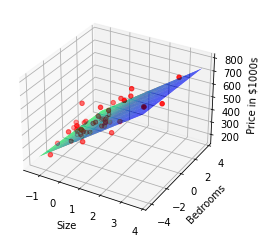

In [22]:
# Initiliazing figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Setting labels
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price in $1000s')

# Creating a meshgrid to plot our data
xx, yy = np.meshgrid(range(1000,5000), range(0,7))

# Normalizing the meshgrid
xx = (xx - size_mean) / size_std
yy = (yy - bedrooms_mean) / bedrooms_std


# Plotting the normalized data
ax.scatter(X['Size'],X['Bedrooms'],data['Price']/1000, color='red');

# Calculating the plane formed by theta[slope of x, y, z]
z = theta[0] + theta[1] * xx + theta[2] * yy

ax.plot_surface(xx,              # X co-ordinates
                yy,              # Y co-ordinates
                z/1000,          # Z co-ordinates 
                cmap='winter_r', # Color Map
                rstride=1, 
                cstride=1)       # For better visibility
ax.view_init(elev=30);           # Setting view angle elevation to 30deg

### Prediction

In [23]:
def predict(size, bed):
    
    # Normalizing
    size = (size - size_mean) / size_std
    bed = (bed - bedrooms_mean) / bedrooms_std
    
    
    price = 1 * theta[0] + size * theta[1] + size * theta[2]
    
    return price
    

In [24]:
import random

for i in range(10):
    
    size = random.randint(800, 4500)
    bed = random.randint(1, 6)
    
    predicted = predict(size, bed)
    
    print(f'The price of house with {bed} beds with size {size} is ${predicted:,.2f}')
    

The price of house with 4 beds with size 3866 is $584,477.40
The price of house with 4 beds with size 1994 is $339,538.51
The price of house with 3 beds with size 4446 is $660,366.59
The price of house with 5 beds with size 4031 is $606,066.57
The price of house with 1 beds with size 3128 is $487,914.96
The price of house with 4 beds with size 2834 is $449,446.99
The price of house with 5 beds with size 3742 is $568,252.82
The price of house with 4 beds with size 1503 is $275,294.39
The price of house with 2 beds with size 3375 is $520,233.28
The price of house with 1 beds with size 3855 is $583,038.12
